In [64]:
"""
BUAN 6341: Applied Machine Learning
Homework 1_Linear Regression

Siddhartha Shankar
"""
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

In [21]:
#os.getcwd()
energy_data = pd.read_csv("energydata_complete.csv")
energy_data.shape

(19735, 29)

In [22]:
type(energy_data)

pandas.core.frame.DataFrame

In [23]:
energy_data.describe


<bound method NDFrame.describe of                       date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
5      2016-01-11 17:50:00          50      40  19.890000  46.026667   
6      2016-01-11 18:00:00          60      50  19.890000  45.766667   
7      2016-01-11 18:10:00          60      50  19.856667  45.560000   
8      2016-01-11 18:20:00          60      40  19.790000  45.597500   
9      2016-01-11 18:30:00          70      40  19.856667  46.090000   
10     2016-01-11 18:40:00         230      70  19.926667  45.863333   
11     2016-01-11 18:50:00         580      60  20.066667  46.396667   
12     2016-01-11 19:00:00    

In [24]:
new_energy = energy_data.filter(['T1','T2','T3','T4','T5','T6','T7','T8','T9'], axis=1)
new_energy.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


(array([1.6238e+04, 1.7230e+03, 8.3900e+02, 4.9300e+02, 2.1200e+02,
        1.3000e+02, 6.9000e+01, 2.4000e+01, 5.0000e+00, 2.0000e+00]),
 array([  10.,  117.,  224.,  331.,  438.,  545.,  652.,  759.,  866.,
         973., 1080.]),
 <a list of 10 Patch objects>)

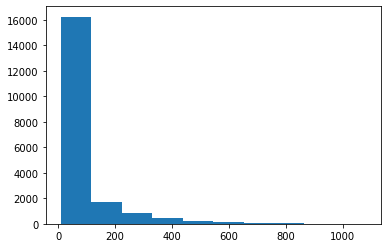

In [26]:
plt.hist(energy_data.Appliances, bins = 10)

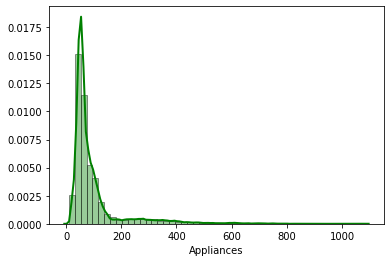

In [27]:
sb.distplot(energy_data['Appliances'], hist=True, kde=True, 
             bins= 50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

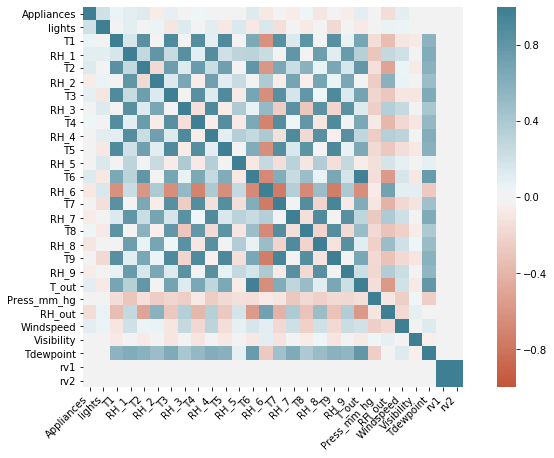

In [28]:
# Correlation Matrix

import seaborn as sb
corr = energy_data.corr()
plt.figure(figsize=(12,7))
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [473]:
'''
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Train the model using the training sets
# regr.fit(x, y)
# The coefficients
# print('Coefficients: \n', regr.coef_)
# print(regr.summary())
X2 = sm.add_constant(x)
X2
est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())
'''

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.565
Model:                            OLS   Adj. R-squared (uncentered):              0.564
Method:                 Least Squares   F-statistic:                              1504.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:10:45   Log-Likelihood:                          15895.
No. Observations:               19735   AIC:                                 -3.176e+04
Df Residuals:                   19718   BIC:                                 -3.162e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
# Linear Regression Model I

energy_data1 = energy_data.drop(columns=['date','lights', 'T6','RH_6','T8','RH_8','T9','RH_9','rv1', 'rv2', 'Visibility'])
energy_data1.shape
energy_data1 = energy_data1.round(3)

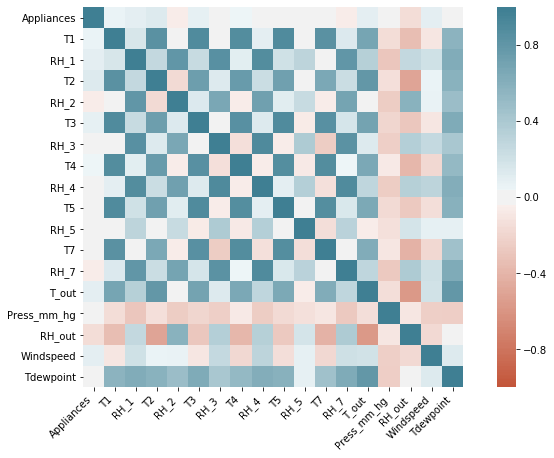

In [30]:
# Correlation


corr = energy_data1.corr()
plt.figure(figsize=(12,7))
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [31]:
energy_data1= preprocessing.normalize(energy_data1)

In [32]:
y = energy_data1[:,0]
y = np.transpose(np.array([(y)]))
x = energy_data1[:,1:18]

In [33]:
y.shape

(19735, 1)

In [34]:
# create training and testing vars
random.seed(144)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(13814, 17) (13814, 1)
(5921, 17) (5921, 1)


In [35]:
#Assigning X0 = 1 to training and test dataset for matrix multiplication
x_train = np.c_[np.ones((len(x_train),1)),x_train]
x_test = np.c_[np.ones((len(x_test),1)),x_test]


In [36]:
x_test.shape

(5921, 18)

In [37]:
#Cost Function and Gradient descent algorithm

def cost_fn(theta,x,y):
    m = len(y)
    predicted_value = np.dot(x,theta)
    cost = (1/(2*m))* np.sum(np.square(predicted_value-y))
    return cost

def gradient_descent(x,y,theta,lrng_rate,itrs):
    m = len(y)
    cost_log = np.zeros(itrs)
    theta_log = np.zeros((itrs,(x.shape[1])))
    for i in range(itrs):
        
        prediction = np.dot(x,theta)
        
        theta = theta - lrng_rate* (1/m)* (x.T.dot((prediction - y)))
#         print(theta)
        theta_log[i,:] = theta.T
        cost_log[i] = cost_fn(theta,x,y)
    return theta, cost_log, theta_log
    

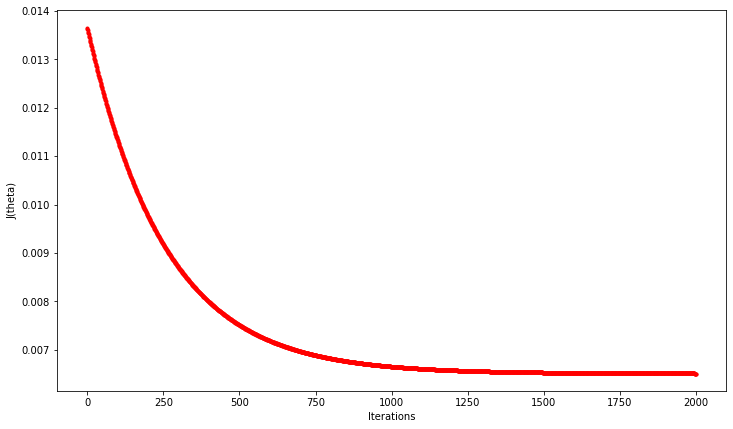

In [38]:
lrng_rate = 0.001
itrs = 2000
#theta = np.random.randn(x_train.shape[1],1)
theta = np.zeros(((x_train.shape)[1],1))
#print(theta)
theta,cost_log,theta_log = gradient_descent(x_train,y_train,theta,lrng_rate,itrs)

fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(itrs),cost_log,'r.')

In [39]:
threshold = 0.0000001
def converge(x, y, theta, lrng_rate, threshold, itrs):
  converged = False
  j = 0
  m=len(y)  
  cost_present = cost_fn(theta,x,y)
  while (converged == False):
        prediction = np.dot(x,theta)
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        cost_new = cost_fn(theta,x_test,y_test)
        
        if(abs(cost_new - cost_present)  <= threshold or j == itrs) :
              coverged = True
              break
        j+=1
        cost_present = cost_new
  return j,cost_new,theta
#theta = np.random.randn(18,1)
theta = np.zeros(((x.shape)[1]+1,1))
iterations,cost,theta_optimal = converge(x_train, y_train, theta, lrng_rate, threshold, itrs)
print(iterations)
print(cost)

1368
0.005936773976471936


In [40]:
print(theta_optimal.T)

[[0.05927231 0.00152671 0.00285919 0.00146706 0.00275625 0.00158202
  0.00273824 0.0014677  0.00272077 0.00137091 0.00354877 0.00142058
  0.00239527 0.00062959 0.05228705 0.00505771 0.00032593 0.00028006]]


In [41]:
predicted_value = np.dot(x_train,theta_optimal)
MSE_train = np.sum(np.square(predicted_value-y_train))
MSE_train

180.891881821399

In [42]:
predicted_value_test = np.dot(x_test,theta_optimal)
MSE_test = np.sum(np.square(predicted_value_test-y_test))
MSE_test

70.30327742938066

In [43]:
# Linear Regression Model II
# Picking ten features randomly and retraining the models only on these ten features
energy_data_random = energy_data.drop(columns=['date','lights', 'RH_1','RH_2','RH_3','RH_4','RH_5','T6','RH_6','RH_7','RH_8','T9','RH_9','RH_out','Windspeed','rv1', 'rv2', 'Visibility'])
energy_data_random = energy_data_random.round(3)

In [44]:
energy_data_random.shape

(19735, 11)

In [45]:
energy_data_random = preprocessing.normalize(energy_data_random)

In [46]:
y_random = energy_data_random[:,0]
y_random = np.transpose(np.array([(y_random)]))
x_random = energy_data_random[:,1:11]

In [47]:
#Splitting into training and test dataset

random.seed(144)

x_random_train, x_random_test, y_random_train, y_random_test = train_test_split(x_random, y_random, test_size=0.30)
print (x_random_train.shape, y_random_train.shape)
print (x_random_test.shape, y_random_test.shape)

(13814, 10) (13814, 1)
(5921, 10) (5921, 1)


In [48]:
x_random_train = np.c_[np.ones((len(x_random_train),1)),x_random_train]
x_random_test = np.c_[np.ones((len(x_random_test),1)),x_random_test]

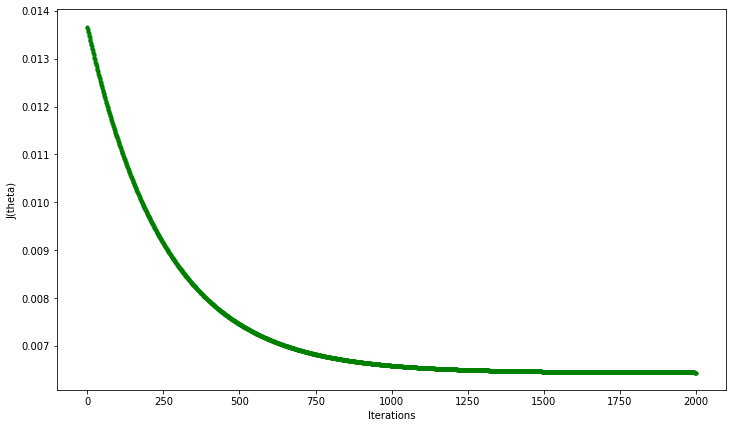

In [49]:
lrng_rate = 0.001
itrs = 2000
#theta = np.random.randn(x_random_train.shape[1],1)
theta = np.zeros(((x_random_train.shape)[1],1))
#print(theta)
theta,cost_log,theta_log = gradient_descent(x_random_train,y_random_train,theta,lrng_rate,itrs)

fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(itrs),cost_log,'g.')


In [66]:
threshold = 0.0000001
def converge(x, y, theta, lrng_rate, threshold, itrs):
  converged = False
  j = 0
  m=len(y)  
  cost_present = cost_fn(theta,x,y)
  while (converged == False):
        prediction = np.dot(x,theta)
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        cost_new = cost_fn(theta,x_random_test,y_random_test)
        
        if(abs(cost_new - cost_present)  <= threshold or j == itrs) :
              coverged = True
              break
        j+=1
        cost_present = cost_new
  return j,cost_new,theta
#theta = np.random.randn(18,1)
theta = np.zeros(((x_random_train.shape)[1],1))
iterations,cost,theta_optimal_random = converge(x_random_train, y_random_train, theta, lrng_rate, threshold, itrs)
print(iterations)
print(cost)

1474
0.006528343095764709


In [67]:
print(theta_optimal_random.T)

[[0.06052109 0.00157195 0.00151187 0.00162859 0.00151005 0.00141244
  0.00146009 0.00159362 0.00064842 0.05387615 0.00028904]]


In [52]:
predicted_value_random = np.dot(x_random_train,theta_optimal)
MSE_train_random = np.sum(np.square(predicted_value_random-y_random_train))
MSE_train_random

178.70157624361923

In [53]:
predicted_value_test_random = np.dot(x_random_test,theta_optimal)
MSE_test_random = np.sum(np.square(predicted_value_test_random-y_random_test))
MSE_test_random

77.30863894004568

In [54]:
# Linear Regression Model III
# Picking ten features randomly that are best suited to predict and retraining the models only on these ten features

energy_data_best = energy_data.drop(columns=['date','lights','T4','RH_4', 'T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','Windspeed','rv1', 'rv2', 'Visibility','Tdewpoint','Press_mm_hg'])
energy_data_best = energy_data_best.round(3)
energy_data_best.describe

<bound method NDFrame.describe of        Appliances      T1    RH_1      T2    RH_2      T3    RH_3      T5  \
0              60  19.890  47.597  19.200  44.790  19.790  44.730  17.167   
1              60  19.890  46.693  19.200  44.722  19.790  44.790  17.167   
2              50  19.890  46.300  19.200  44.627  19.790  44.933  17.167   
3              50  19.890  46.067  19.200  44.590  19.790  45.000  17.167   
4              60  19.890  46.333  19.200  44.530  19.790  45.000  17.200   
5              50  19.890  46.027  19.200  44.500  19.790  44.933  17.133   
6              60  19.890  45.767  19.200  44.500  19.790  44.900  17.100   
7              60  19.857  45.560  19.200  44.500  19.730  44.900  17.100   
8              60  19.790  45.598  19.200  44.433  19.730  44.790  17.167   
9              70  19.857  46.090  19.230  44.400  19.790  44.863  17.100   
10            230  19.927  45.863  19.357  44.400  19.790  44.900  17.100   
11            580  20.067  46.397  19.427 

In [55]:
energy_data_best= preprocessing.normalize(energy_data_best)

In [56]:
y_best = energy_data_best[:,0]
y_best = np.transpose(np.array([(y_best)]))
x_best = energy_data_best[:,1:11]

In [57]:
#Splitting into training and test dataset

random.seed(144)

x_best_train, x_best_test, y_best_train, y_best_test = train_test_split(x_best, y_best, test_size=0.30)
print (x_best_train.shape, y_best_train.shape)
print (x_best_test.shape, y_best_test.shape)

(13814, 10) (13814, 1)
(5921, 10) (5921, 1)


In [58]:
x_best_train = np.c_[np.ones((len(x_best_train),1)),x_best_train]
x_best_test = np.c_[np.ones((len(x_best_test),1)),x_best_test]

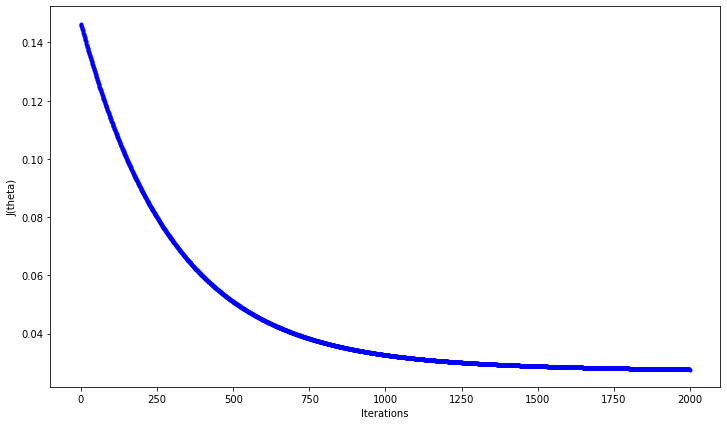

In [59]:
lrng_rate = 0.001
itrs = 2000
#theta = np.random.randn(x_best_train.shape[1],1)
theta = np.zeros(((x_best_train.shape)[1],1))
#print(theta)
theta,cost_log,theta_log = gradient_descent(x_best_train,y_best_train,theta,lrng_rate,itrs)

fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(itrs),cost_log,'b.')

In [68]:
threshold = 0.0001

def converge(x, y, theta, lrng_rate, threshold, itrs):
  converged = False
  j = 0
  m=len(y)  
  cost_present = cost_fn(theta,x,y)
  while (converged == False):
        prediction = np.dot(x,theta)
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        cost_new = cost_fn(theta,x_best_test,y_best_test)
        
        if(abs(cost_new - cost_present)  <= threshold or j == itrs) :
              coverged = True
              break
        j+=1
        cost_present = cost_new
  return j,cost_new,theta
#theta = np.random.randn(18,1)
theta = np.zeros(((x_best_train.shape)[1],1))
iterations,cost,theta_optimal_best = converge(x_best_train, y_best_train, theta, lrng_rate, threshold, itrs)
print(iterations)
print(cost)

413
0.0591800998229674


In [69]:
print(theta_optimal_best.T)

[[0.15273942 0.01961279 0.03575395 0.01851912 0.0355852  0.02011822
  0.03476334 0.01770546 0.04501185 0.00731472 0.06817113]]


In [62]:
predicted_value_train_best = np.dot(x_best_train,theta_optimal)
MSE_train_best = np.sum(np.square(predicted_value_train_best-y_best_train))
MSE_train_best

1614.1364671587019

In [63]:
predicted_value_test_random = np.dot(x_best_test,theta_optimal)
MSE_test_best = np.sum(np.square(predicted_value_test_random-y_best_test))
MSE_test_best

700.81074210358